<a href="https://colab.research.google.com/github/samiha-mahin/A-Machine-Learning-Models-Repo/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **🌟 What is K-Means Clustering?**

**K-Means Clustering** is an **unsupervised machine learning algorithm** used to group similar data points into **K number of clusters**.

* Each **cluster** groups together points that are similar to each other.
* The algorithm finds the best grouping by minimizing the **distance** between data points and their cluster center (called a **centroid**).

---

## 📌 Key Concepts

| Term        | Meaning                                                                |
| ----------- | ---------------------------------------------------------------------- |
| K           | Number of clusters you want to divide your data into.                  |
| Centroid    | The center of a cluster. It's an average position of all points in it. |
| Inertia     | The sum of squared distances of points to their closest centroid.      |
| Convergence | When centroids stop moving (no major updates), the algorithm stops.    |

---

## 🧠 How K-Means Works (Step-by-Step)

1. **Choose the value of K**

   * You decide how many clusters you want (e.g., K = 3).

2. **Initialize K centroids randomly**

   * These are just random points in the data space at first.

3. **Assign each point to the nearest centroid**

   * Using a distance metric (usually **Euclidean distance**).

4. **Update centroids**

   * Calculate the new mean of all the points in each cluster.
   * This becomes the new centroid.

5. **Repeat steps 3 and 4**

   * Until the centroids **do not change much** anymore (i.e., convergence).

---

## 🧮 Example (2D Visual)

Let’s say we have the following 6 points:

```
A(1, 2), B(2, 3), C(3, 2), D(8, 8), E(9, 10), F(10, 9)
```

And we choose K = 2 (we want to make 2 clusters).

**Step 1**: Randomly pick 2 initial centroids, say:

* C1 = A(1, 2)
* C2 = D(8, 8)

**Step 2**: Assign each point to the nearest centroid:

* A, B, C → closer to C1
* D, E, F → closer to C2

So, two clusters:

* Cluster 1: A, B, C
* Cluster 2: D, E, F

**Step 3**: Recalculate centroids:

* C1 becomes mean of A, B, C
* C2 becomes mean of D, E, F

Repeat the assignment + update until centroids stabilize.

---

## 📊 Choosing the Right K: The Elbow Method

* Run K-Means for different values of K (e.g., K = 1 to 10)
* Plot **K vs Inertia (within-cluster sum of squares)**.
* The "elbow point" is where the inertia starts to decrease slowly — that’s usually the best K.

---

## ✅ Pros and Cons

### ✅ Pros:

* Simple and fast
* Works well when clusters are well-separated

### ❌ Cons:

* You have to choose K manually
* Doesn’t work well with non-spherical clusters
* Sensitive to outliers and initial placement

---

## 🔍 When to Use K-Means?

* Market segmentation
* Image compression
* Anomaly detection
* Document or text clustering
* Recommender systems



In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

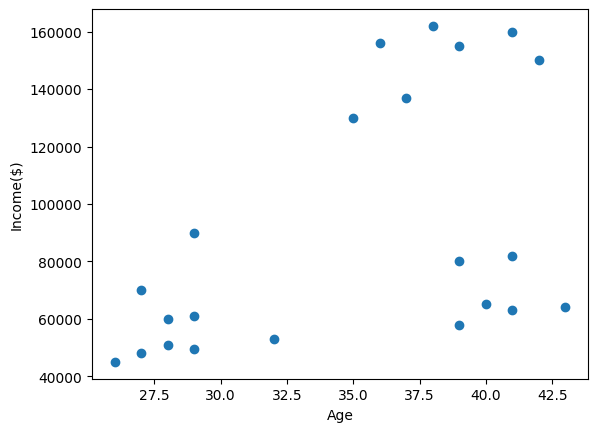

In [3]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [25]:
# Create and fit the model
km = KMeans(n_clusters=3)
df['cluster'] = km.fit_predict(df[['Age', 'Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [23]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

**💬 What this means:**

You are asking the KMeans model (km) to:

1.Look at just two columns from your dataset: Age and Income($)

2.Find patterns or groups (called clusters) among these data points.

3.Assign each row to one of the clusters (like giving each person a group number).

4.The result (called y_predicted) is a list showing which cluster each person
belongs to.

**Now suppose KMeans groups people into 3 clusters (K=3) based on similar Age and Income.**

The model might think:

Cluster 0 = young + low income

Cluster 1 = middle-aged + high income

Cluster 2 = young + medium income

**array**([2, 2, 0, 0, 1, ...])
**That means:**

Rob → cluster 2

Michael → cluster 2

Mohan → cluster 0

Ismail → cluster 0

Kory → cluster 1


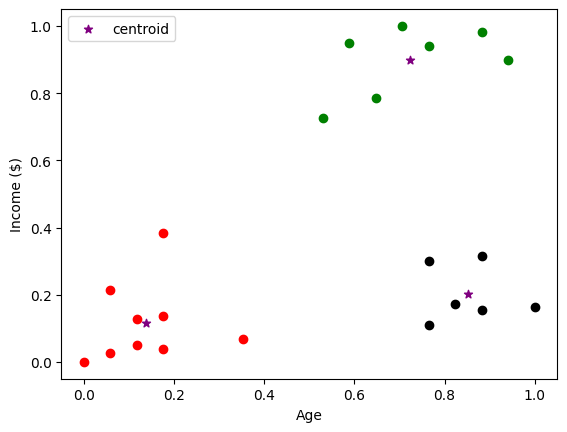

In [26]:

# Split the clusters
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

# Plot the clusters
plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='red')
plt.scatter(df3['Age'], df3['Income($)'], color='black')

# Plot the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')

# Labels and legend
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()


## **Preprocessing using min max scaler**

In [27]:
scaler = MinMaxScaler()
df[['Age', 'Income($)']] = scaler.fit_transform(df[['Age', 'Income($)']])
df.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


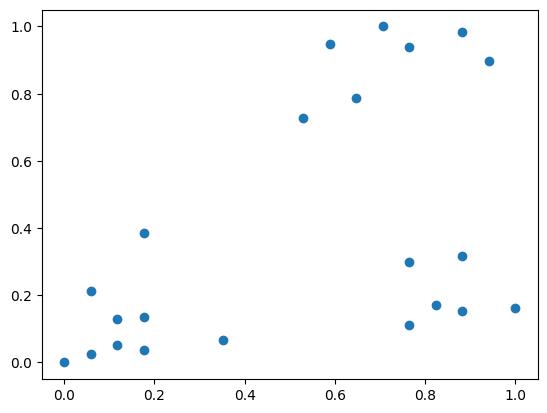

In [28]:
plt.scatter(df['Age'],df['Income($)'])

In [30]:
# Create and fit the model
km = KMeans(n_clusters=3)
df['cluster'] = km.fit_predict(df[['Age', 'Income($)']])
df.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [31]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

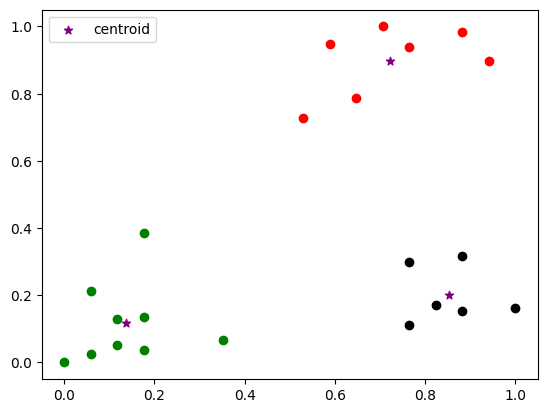

In [32]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

**Elbow Plot**

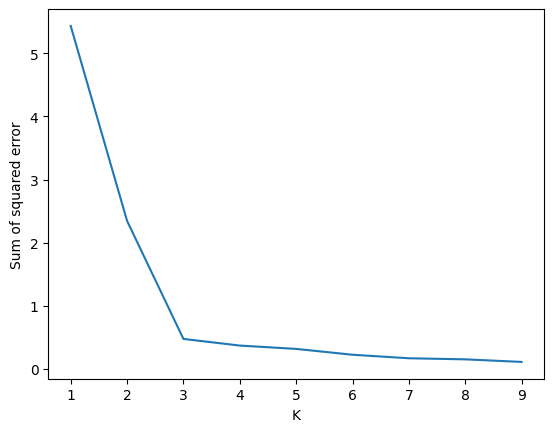

In [33]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)